In [25]:
import sys
sys.path.insert(0, "ov-predict/src/")

In [26]:
from api.model_loader import init_model
from api.model_loader import init_embedding
from api.model_loader import predict_outcome_with_dynamic_vocabchange

In [27]:
#committed the merged file in git
#EMBFILE="../../core/prediction/graphs/nodevecs/nodes_and_words.vec"
EMBFILE="../../core/prediction/graphs/nodevecs/ndvecs.cv.128-10-0.1-0.9-both-0-false.merged.vec"
SAVED_MODEL_FILE='ov-predict/saved_models/model.h5'
NODEVEC_DIM=128
PUBMED_DIM=200
VAL_DIMENSIONS=5
NUM_CLASSES = 0
MAXLEN=50

inpH = init_embedding(EMBFILE)
trained_model = init_model(inpH, saved_model_wts_file=SAVED_MODEL_FILE)

converting words to ids...
Collected node names...
Converting words to ids...
Finished converting words to ids...
vocab size = 38892
Loading W2V data...
skipping word M:6080688:When_Smokers_QuitThe_Health_Bene
skipping word M:6080688:lea
skipping word SO:6080714:quali
skipping word R:6080719:Two_hundred_and_
loaded word2vec for 38891 nodes
5 words out of 38892 not found
DEBUG: shape of embedding: (38892, 333)
DEBUG: include_wordvecs = False
DEBUG: During API call - emb matrix o/p dimension: 333
DEBUG: During API call - emb matrix shape: (38892, 333)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 333)           12951036  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               203776    
_________________________________________________________________
output_vals (Dense)      

In [28]:
def outcome(data):
    predicted_val = predict_outcome_with_dynamic_vocabchange(inpH, trained_model, data)
    return predicted_val

Inp: C:5579096:65 I:3675717:1 I:3674258:1 I:3675611:1 O:4087166:collateral_contacts O:4087166:expired_air_carbon_monoxide O:4087191:12
7.3 8.616499900817871
Inp: C:5579096:65 I:3675717:1 I:3674258:1 I:3675611:1 O:4087166:collateral_contacts O:4087166:expired_air_carbon_monoxide O:4087191:24
8.5 8.88176155090332
Inp: C:5579096:65 I:3675717:1 I:3674258:1 I:3675611:1 O:4087166:collateral_contacts O:4087166:expired_air_carbon_monoxide O:4087191:52
16.7 9.151809692382812
Inp: C:5579096:65 I:3675611:1 I:4085489:1 O:4087166:collateral_contacts O:4087166:expired_air_carbon_monoxide O:4087191:12
12.5 8.7247953414917
Inp: C:5579096:65 I:3675611:1 I:4085489:1 O:4087166:collateral_contacts O:4087166:expired_air_carbon_monoxide O:4087191:24
17.5 9.015816688537598
Inp: C:5579096:65 I:3675611:1 I:4085489:1 O:4087166:collateral_contacts O:4087166:expired_air_carbon_monoxide O:4087191:52
26.2 9.27437973022461


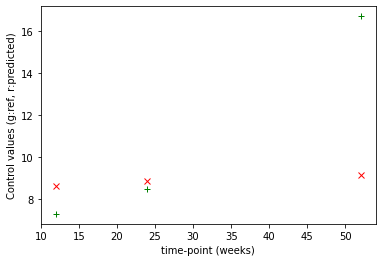

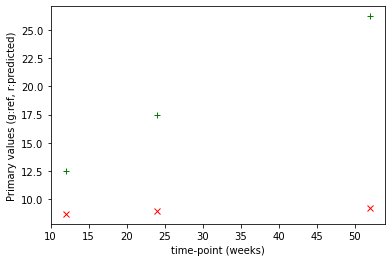

In [41]:
import numpy as np
import matplotlib.pyplot as plt

#We build a few test cases and store them in a dictionary keyed by the docname
#values being a list of data instances corresponding to each arm
TESTSET={
    "Hick_2015.pdf": [["C:5579096:65 I:3675717:1 I:3674258:1 I:3675611:1 O:4087166:collateral_contacts O:4087166:expired_air_carbon_monoxide",
                       "7.3:12 8.5:24 16.7:52"],
                      ["C:5579096:65 I:3675611:1 I:4085489:1 O:4087166:collateral_contacts O:4087166:expired_air_carbon_monoxide",
                       "12.5:12 17.5:24 26.2:52"]]
}

ARMNAMES = ['Control', 'Primary']
armId = 0

for doc in TESTSET:
    arms = TESTSET[doc]
    
    for data in arms:        
        tp_list = []
        refvalues_toplot = []
        values_toplot = []
        
        inp = data[0]
        ref_outcomes = data[1]
        ref_outcomesList = ref_outcomes.split(' ')
        for ref_o in ref_outcomesList:
            tokens = ref_o.split(':')
            tp = tokens[1]
            ref_value = tokens[0]
            inp_with_tp = inp + ' O:4087191:' + tp
            print ("Inp: {}".format(inp_with_tp))
            pvalue = outcome(inp_with_tp)
            print('{} {}'.format(ref_value, pvalue[0]))
            
            tp_list.append(float(tp))
            refvalues_toplot.append(float(ref_value))
            values_toplot.append(float(pvalue[0]))
    
        x = np.asarray(tp_list)
        y1 = np.asarray(refvalues_toplot)
        y2 = np.asarray(values_toplot)

        plt.figure()
        plt.xlabel('time-point (weeks)')
        plt.ylabel(ARMNAMES[armId] + ' values (g:ref, r:predicted)')
        plt.plot(x, y1, 'g+', x, y2, 'rx')
        
        armId += 1
    
plt.show()            

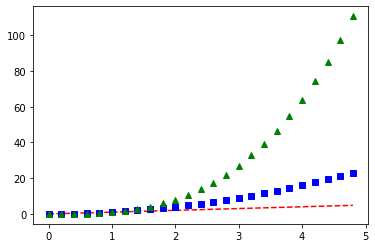

In [31]:
#Plot the numbers
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()